# Intro to tensor flow
 - Basic models over MNIST dataset
   - Linear model
   - NN one layer node
   - Convolutional model
 - Tensoboard example
 - Save & load models

In [1]:
# Header
# Basic libraries & options
from __future__ import print_function

#Basic libraries
import numpy as np
import tensorflow as tf
print('Tensorflow version: ', tf.__version__)

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 10)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
plt.rcParams['image.cmap'] = 'gray'  # use grayscale 


Tensorflow version:  1.0.0


In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

## Get the MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/home/ubuntu/data/training/image/mnist', one_hot=True)

Extracting /home/ubuntu/data/training/image/mnist/train-images-idx3-ubyte.gz
Extracting /home/ubuntu/data/training/image/mnist/train-labels-idx1-ubyte.gz
Extracting /home/ubuntu/data/training/image/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/ubuntu/data/training/image/mnist/t10k-labels-idx1-ubyte.gz


Train shape:  (55000, 784)
Valid shape:  (5000, 784)
Test  shape:  (10000, 784)


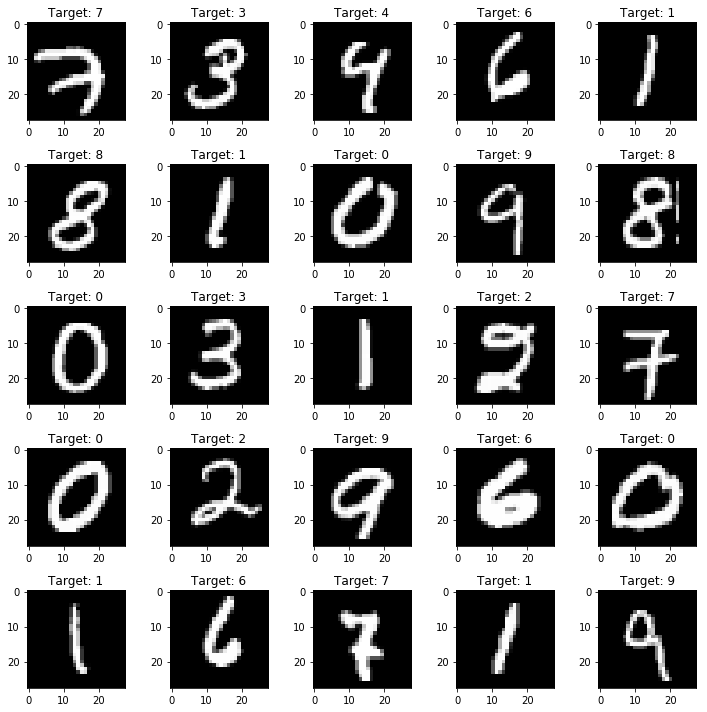

In [3]:
#Examine the data
print('Train shape: ', mnist.train.images.shape)
print('Valid shape: ', mnist.validation.images.shape)
print('Test  shape: ', mnist.test.images.shape)

fig = plt.figure()
for i in range(25):
    a = fig.add_subplot(5,5,i+1)
    a.set_title('Target: ' + str(np.argmax(mnist.train.labels[i])))
    fig.tight_layout()
    plt.imshow( np.reshape(mnist.train.images[i],(28,28)) )



## Fist model: Linear model
 - Start an interactive session
 - Define the graph
 - Train the graph
   - Initialize variables
   - Loop over the data runing the trainer
 - Validate model with test accuracy

In [4]:
# Start an interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))


In [5]:
### Define the graph
# - Placeholders
# - Model
# - Loss
# - Trainer

# Inputs
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])


#------------------------------------
#-----------   MODEL  ---------------
#------------------------------------
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y_pred = tf.nn.softmax(tf.matmul(x,W) + b)
#------------------------------------


# Loss
cross_entropy = -tf.reduce_sum(y * tf.log(y_pred))

# Trainer
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)


In [6]:
### Train the graph
# Intialize vars
sess.run(tf.global_variables_initializer())

In [7]:
# Iterate running the trainer
batch_size = 128
num_epoch = 50
for epoch in range(num_epoch):
    for i in range(430):  # 215 * batch_size is aprox the train size (55000)
        batch = mnist.train.next_batch(batch_size)
        train_step.run(feed_dict={x: batch[0], y: batch[1]})

In [8]:
# Predict and evaluate    
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: ', accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Test accuracy:  0.9249


In [9]:
#When finish, close the interactive session
sess.close()

## Model 2: Neural network model
 - Add a dense layer between the inputs & the output

In [11]:
def dense_layer(x, input_dim=10, output_dim=10, name='dense'):
    '''
    Dense layer function
    Inputs:
      x: Input tensor
      input_dim: Dimmension of the input tensor.
      output_dim: dimmension of the output tensor
      name: Layer name
    '''
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name='W_'+name)
    b = tf.Variable(tf.constant(0.1, shape=[output_dim]), name='b_'+name)
    dense_output = tf.nn.relu(tf.matmul(x, W) + b)
    return dense_output

In [12]:
# Start an interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))


### Define the graph

# Inputs
x_nn = tf.placeholder(tf.float32, shape=[None, 784])
y_nn = tf.placeholder(tf.float32, shape=[None, 10])


#------------------------------------
#-----------   MODEL  ---------------
#------------------------------------
# First layer
dense_nn_1 = dense_layer(x_nn, input_dim=784, output_dim=500, name='dense1')

# Final layer
dense_nn_2 = dense_layer(dense_nn_1, input_dim=500, output_dim=10, name='dense2')
#------------------------------------

# Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=dense_nn_2, labels=y_nn)

#Optimizer
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)


# Predict and evaluate    
y_pred = tf.nn.softmax(dense_nn_2)
correct_prediction = tf.equal(tf.argmax(y_nn,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


### Train the graph
# Intialize vars
sess.run(tf.global_variables_initializer())


# Iterate running the trainer
batch_size = 128
num_epoch = 50
for epoch in range(num_epoch):
    for i in range(430):  # 430 * batch_size is aprox the train size (55000)
        batch = mnist.train.next_batch(batch_size)
        train_step.run(feed_dict={x_nn: batch[0], y_nn: batch[1]})
    print('Epoch: ',epoch,' - Accuracy: ', accuracy.eval(feed_dict={x_nn: mnist.test.images, y_nn: mnist.test.labels}))

print('Test accuracy: ', accuracy.eval(feed_dict={x_nn: mnist.test.images, y_nn: mnist.test.labels}))
    

#When finish, close the interactive session
sess.close()

Epoch:  0  - Accuracy:  0.5512
Epoch:  1  - Accuracy:  0.573
Epoch:  2  - Accuracy:  0.576
Epoch:  3  - Accuracy:  0.5768
Epoch:  4  - Accuracy:  0.5759
Epoch:  5  - Accuracy:  0.5703
Epoch:  6  - Accuracy:  0.5737
Epoch:  7  - Accuracy:  0.6615
Epoch:  8  - Accuracy:  0.7645
Epoch:  9  - Accuracy:  0.763
Epoch:  10  - Accuracy:  0.7645
Epoch:  11  - Accuracy:  0.7653
Epoch:  12  - Accuracy:  0.7625
Epoch:  13  - Accuracy:  0.7656
Epoch:  14  - Accuracy:  0.7659
Epoch:  15  - Accuracy:  0.7649
Epoch:  16  - Accuracy:  0.7662
Epoch:  17  - Accuracy:  0.7631
Epoch:  18  - Accuracy:  0.7683
Epoch:  19  - Accuracy:  0.7691
Test accuracy:  0.7691


## Model 3: Convolutional model
 - Add 2 convolution and max pooling layers previous to the dense layers
 - Add a dropout regularization layer in the first dense layer

In [13]:
def conv_layer(x, size=2, input_channels=1, output_channels=32, name='conv'):
    '''
    Function to configure a convolution layer
    Inputs:
      x: Input tensor
      size: Convolution filter size x size
      input_channels: Num of input channels
      output_channels: Num of output channels
    '''
    W_conv = tf.Variable(tf.truncated_normal([size, size, input_channels, output_channels], stddev=0.1), name='W_'+name)
    b_conv = tf.Variable(tf.constant(0.1, shape=[output_channels]), name='b_'+name)
    conv_out = tf.nn.relu(tf.nn.conv2d(x, W_conv, strides=[1, 1, 1, 1], padding='SAME') + b_conv)
    return conv_out

In [14]:
# Start an interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))

#Create the net
# Inputs
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])


#------------------------------------
#-----------   MODEL  ---------------
#------------------------------------
#Reshape input data to the original image shape
x_image = tf.reshape(x, [-1,28,28,1])

# First convolution
h_conv1 = conv_layer(x_image, size=5, input_channels=1, output_channels=20, name='conv1')
h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print('Conv - pool 1: ', h_pool1)

#Second convolution
h_conv2 = conv_layer(h_pool1, size=5, input_channels=20, output_channels=50, name='conv1')
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print('Conv - pool 2: ', h_pool2)

#First dense layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*50])
h_fc1 = dense_layer(h_pool2_flat, input_dim=7*7*50, output_dim=500, name='dense1')
print('Dense 1: ', h_fc1)

#Dropout 
dropout_keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, dropout_keep_prob)

#Second dense layer
h_fc2 = dense_layer(h_fc1_drop, input_dim=500, output_dim=10)
print('Dense 2: ', h_fc2)

#Prediction
y_pred = tf.nn.softmax(h_fc2)
#------------------------------------


# Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=h_fc2, labels=y, name='cross_entropy')

#Optimizer
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

#Accuracy
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Conv - pool 1:  Tensor("MaxPool:0", shape=(?, 14, 14, 20), dtype=float32)
Conv - pool 2:  Tensor("MaxPool_1:0", shape=(?, 7, 7, 50), dtype=float32)
Dense 1:  Tensor("Relu_4:0", shape=(?, 500), dtype=float32)
Dense 2:  Tensor("Relu_5:0", shape=(?, 10), dtype=float32)


In [15]:
#Inicialization.
sess.run(tf.global_variables_initializer())

# Train proccess
for i in range(600):
    batch = mnist.train.next_batch(128)
    train_step.run(feed_dict={x: batch[0], y: batch[1], dropout_keep_prob: 0.5})
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1], dropout_keep_prob: 1})
        print("step %d, training accuracy %g"%(i, train_accuracy))


step 0, training accuracy 0.140625
step 100, training accuracy 0.828125
step 200, training accuracy 0.960938
step 300, training accuracy 0.96875
step 400, training accuracy 0.976562
step 500, training accuracy 0.96875


In [16]:
acc_test = 0
for i in range(200):
    batch = mnist.test.next_batch(50)
    acc_test += accuracy.eval(feed_dict = {x:batch[0], y: batch[1], dropout_keep_prob: 1.0})
print("test accuracy: ", acc_test/200.)

test accuracy:  0.98409999907


In [17]:
sess.close()

## Use tensorboard to show the net & the training process.
    - The same previous convolutional model with the commands that need tensorboard

Based on https://www.tensorflow.org/how_tos/summaries_and_tensorboard/index.html 

In [18]:
def variable_summaries(var, name):
    """Attach a lot of summaries to a Tensor."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean/'   + name, mean)
        tf.summary.scalar('sttdev/' + name, tf.sqrt(tf.reduce_mean(tf.square(var - mean))))
        tf.summary.scalar('max/'    + name, tf.reduce_max(var))
        tf.summary.scalar('min/'    + name, tf.reduce_min(var))
        tf.summary.histogram(name, var)


In [19]:
def conv_layer(x, size=2, input_channels=1, output_channels=32, name='conv'):
    W_conv = tf.Variable(tf.truncated_normal([size, size, input_channels, output_channels], stddev=0.1), name='W_'+name)
    b_conv = tf.Variable(tf.constant(0.1, shape=[output_channels]), name='b_'+name)
    conv_out = tf.nn.relu(tf.nn.conv2d(x, W_conv, strides=[1, 1, 1, 1], padding='SAME') + b_conv)
    # Add summary ops to collect data
    variable_summaries(W_conv, "weights_"+name) #TENSORBOARD
    variable_summaries(b_conv, "biases_"+name) #TENSORBOARD
    return conv_out


def dense_layer(x, input_dim=10, output_dim=10, name='dense'):
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name='W_'+name)
    b = tf.Variable(tf.constant(0.1, shape=[output_dim]), name='b_'+name)
    dense_output = tf.nn.relu(tf.matmul(x, W) + b)
    variable_summaries(W, "weights_"+name) #TENSORBOARD
    variable_summaries(b, "biases_"+name) #TENSORBOARD
    return dense_output

In [20]:

# Start an interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))


#Create the net
# Inputs
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y = tf.placeholder(tf.float32, shape=[None, 10] , name='y')



#Reshape input data to the original image shape
x_image = tf.reshape(x, [-1,28,28,1])

# First convolution
# use a name scope to organize nodes in the graph visualizer
with tf.name_scope("conv1") as scope:
    h_conv1 = conv_layer(x_image, size=5, input_channels=1, output_channels=20, name='conv1')
    h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print('Conv - pool 1: ', h_pool1)
    # Add summary ops to collect data
    variable_summaries(h_pool1, "h_pool1_summary") #TENSORBOARD

#Second convolution
with tf.name_scope("conv2") as scope:
    h_conv2 = conv_layer(h_pool1, size=5, input_channels=20, output_channels=50, name='conv2')
    h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    print('Conv - pool 2: ', h_pool2)
    variable_summaries(h_pool2, "h_pool2_summary") #TENSORBOARD

#First dense layer
with tf.name_scope("dense1") as scope:
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*50])
    h_fc1 = dense_layer(h_pool2_flat, input_dim=7*7*50, output_dim=500, name='dense1')
    variable_summaries(h_fc1, "dense1_summary") #TENSORBOARD

    #Dropout over 
    dropout_keep_prob = tf.placeholder(tf.float32, name='dropout')
    h_fc1_drop = tf.nn.dropout(h_fc1, dropout_keep_prob)
    
#Second dense layer
with tf.name_scope("dense2") as scope:
    h_fc2 = dense_layer(h_fc1_drop, input_dim=500, output_dim=10, name='dense2')
    print('Dense 2: ', h_fc2)
    variable_summaries(h_fc2, "dense2_summary") #TENSORBOARD

#Prediction
y_pred = tf.nn.softmax(h_fc2)



# Loss function
with tf.name_scope("xent") as scope:
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=h_fc2, labels=y, name='cross_entropy')
    ce_summ = tf.summary.histogram("cross_entropy", cross_entropy) #TENSORBOARD


#Optimizer
with tf.name_scope("train") as scope:
    train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

#Accuracy
with tf.name_scope("test") as scope:
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_summary = tf.summary.scalar("accuracy", accuracy) #TENSORBOARD


Conv - pool 1:  Tensor("conv1/MaxPool:0", shape=(?, 14, 14, 20), dtype=float32)
Conv - pool 2:  Tensor("conv2/MaxPool:0", shape=(?, 7, 7, 50), dtype=float32)
Dense 2:  Tensor("dense2/Relu:0", shape=(?, 10), dtype=float32)


In [21]:
# Merge all the summaries and write it into /tmp/tensorboard/mnist_logs
summaries_dir = '/tmp/tensorboard/mnist_conv'
with tf.name_scope('summaries') as scope:
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter(summaries_dir + '/train', sess.graph)
    test_writer  = tf.summary.FileWriter(summaries_dir + '/test')
    


In [22]:
#Inicialization.
sess.run(tf.global_variables_initializer())

# Train proccess
for i in range(600):
    batch = mnist.train.next_batch(128)
    train_step.run(feed_dict={x: batch[0], y: batch[1], dropout_keep_prob: 0.5})
    
    if i % 10 == 0:  # Record summary data for one batch
        summary_str = merged.eval(feed_dict={x: batch[0], y: batch[1], dropout_keep_prob: 1.})
        train_writer.add_summary(summary_str, i) #TENSORBOARD
        
        batch_test = mnist.test.next_batch(128)
        summary_str = merged.eval(feed_dict={x: batch_test[0], y: batch_test[1], dropout_keep_prob: 1.})
        test_writer.add_summary(summary_str, i) #TENSORBOARD
        

In [23]:
sess.close()

At the end execute tensorboar with:

    cd /tmp

    tensorboard --logdir=./tensorboard

And accest to it in:

    http://localhost:6006


## Save and load models


## Restart kernel...

In [24]:
# Create and save model

import tensorflow as tf

#Load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/ubuntu/data/training/image/mnist', one_hot=True)

# Start interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))

# Define graph
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y = tf.placeholder(tf.float32, shape=[None, 10], name='y')

with tf.name_scope("model") as scope:
    W = tf.Variable(tf.zeros([784,10]), name='W1')
    b = tf.Variable(tf.zeros([10]), name='b1')
#Prediction
y_pred = tf.nn.softmax(tf.matmul(x,W) + b, name='y_pred')

#Loss
cross_entropy = -tf.reduce_sum(y*tf.log(y_pred), name='cross_entropy')

# Train graph
train_step = tf.train.GradientDescentOptimizer(0.01, name='train_step').minimize(cross_entropy)


# Inicialize graph vars
sess.run(tf.global_variables_initializer())
for i in range(100):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y: batch[1]})

# Predict and evaluate    
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

print('cross_entropy test', cross_entropy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
print('Accuracy test', accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))


# Create a saver and save weigths.
tf.add_to_collection('cross_entropy', cross_entropy)
tf.add_to_collection('x', x)
tf.add_to_collection('y', y)
tf.add_to_collection('accuracy', accuracy)
saver = tf.train.Saver(max_to_keep=0)
saver.save(sess, '/tmp/my-model',)


#Close session
sess.close()


KeyboardInterrupt: 

## Restart kernel...

In [ ]:
# Load pretrained model and evaluate it

import tensorflow as tf

#Load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/ubuntu/data/training/image/mnist', one_hot=True)


# Start interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))

#Load model
new_saver = tf.train.import_meta_graph('/tmp/my-model.meta')
new_saver.restore(sess, '/tmp/my-model')
cross_entropy = tf.get_collection('cross_entropy')[0]
x = tf.get_collection('x')[0]
y = tf.get_collection('y')[0]
accuracy = tf.get_collection('accuracy')[0]


# Evaluate over the test data
print('cross_entropy test', cross_entropy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
print('Accuracy test', accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

sess.close()

In [ ]:
# List of variables saved in a model file
reader = tf.train.NewCheckpointReader('/tmp/my-model')
print(reader.debug_string().decode("utf-8"))

In [ ]:
# Start interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))

new_saver = tf.train.import_meta_graph('/tmp/my-model.meta')
new_saver.restore(sess, '/tmp/my-model')

sess.graph.get_operations()

sess.close()

## Recurent neural networks example

In [ ]:
import tensorflow as tf

#Load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/ubuntu/data/training/image/mnist', one_hot=True)

# Start interactive session
gpu_options = tf.GPUOptions(allow_growth = True)
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options, log_device_placement=True))

# Define graph
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y = tf.placeholder(tf.float32, shape=[None, 10], name='y')

# Reshape X to a sequnce of columns of dim (batch, time, features)
x_seq = tf.reshape(x, [-1,28,28])

### RNN layer
lstm_size= 128
#lstm = tf.nn.rnn_cell.LSTMCell(lstm_size)
lstm = tf.contrib.rnn.LSTMCell(lstm_size)
rnn_out, _ = tf.nn.dynamic_rnn(lstm, x_seq, dtype=tf.float32)

#Prediction
W = tf.Variable(tf.zeros([lstm_size,10]))
b = tf.Variable(tf.zeros([10]))
y_pred = tf.nn.softmax(tf.matmul(rnn_out[:,-1,:],W) + b, name='y_pred')

#Loss
cross_entropy = -tf.reduce_sum(y*tf.log(y_pred), name='cross_entropy')

# Train graph
train_step = tf.train.GradientDescentOptimizer(0.01, name='train_step').minimize(cross_entropy)

# Predict and evaluate    
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')



# Inicialize graph vars
sess.run(tf.global_variables_initializer())

batch_size = 128
num_epoch = 10
for epoch in range(num_epoch):
    for i in range(430):  # 430 * batch_size is aprox the train size (55000)
        batch = mnist.train.next_batch(batch_size)
        train_step.run(feed_dict={x: batch[0], y: batch[1]})
    print('Epoch: ',epoch,' - Accuracy: ', accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

print('Test accuracy: ', accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))
#Close session
sess.close()
